<Axes: xlabel='pcor', ylabel='cor'>

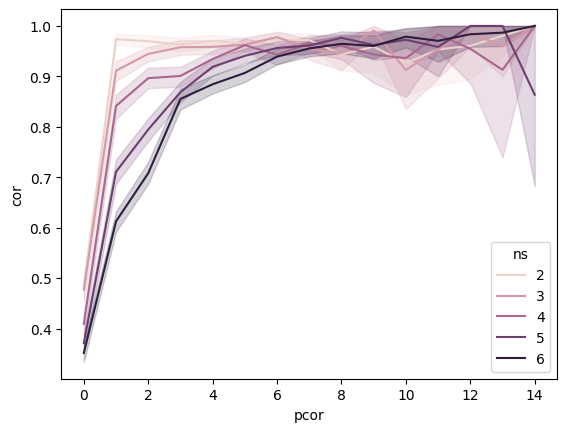

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import BytesIO
import pickle
import requests
import math
import matplotlib.pyplot as plt
import random

# OSF Link: https://osf.io/wgzb6/
"""
1. subno - subject ID
2. block - block number
3. ns - set size
4. time
5. stimseq - stimulus id
6. imageseq - actual image number
7. folderseq - image category number
8. iterseq - iteration number per stimulus
9. corAseq - correct action
10. choice - actual action
11. key - physical key pressed
12. cor - correct? (0/1)
13. rew - reward?
14. rt - reaction time
15. expe condition - experimental condition (for some data sets)
16. pcor - number of previous correct trials for given stimulus (used in logistic regression analysis)
17. delay - delay since last correct trial for same stimulus (same)
"""

mLink = 'https://github.com/TylerJamesMalloy/88308/blob/main/Data/CollinsFrank_2012_EJoN.pkl?raw=true'
mfile = BytesIO(requests.get(mLink).content)
humanData = pickle.load(mfile)
#print(humanData)

# Replicating Figure 3: Top Left
sns.lineplot(data=humanData, x='pcor', y='cor', hue='ns')

# Simulation Environment

In [7]:
def test_agent(agent):
  test_rewards = [[1], [1], [1], [1], [1]]
  for _ in range(int(1e4)):
    for set_index, set_size in enumerate([2,3,4,5,6]):
        episode_length = 4 #random.randint(15, 30)
        rewards = [random.randint(1,3) for _ in range(set_size)]
        for _ in range(episode_length):
            stimuli = random.randint(0,set_size-1)
            choice = agent.choose(stimuli)
            reward = 1 if rewards[stimuli] == choice else 0
            test_rewards[set_index].append(reward)
            agent.reset()

  return [1 / np.mean(set_reward) for set_reward in test_rewards]

# Q-Learning with Soft-max Action Selection


In [8]:
class RL2():
  def __init__(self, alpha, beta):
    self.alpha = alpha
    self.beta = beta
    self.q = np.zeros((6, 3))
    self.pending_choice = None

  def choose(self, stimuli):
    x = self.q[stimuli] * self.beta
    p = np.exp(x) / np.sum(np.exp(x), axis=0)
    action = np.random.choice([0,1,2], p=p)
    self.pending_choice = [stimuli, action]
    return action

  def observe(self, reward):
    self.q[self.pending_choice] = self.q[self.pending_choice] + self.alpha * (reward - self.q[self.pending_choice])

  def reset(self):
    self.q = np.zeros((6, 3))

agent = RL2(0.1, 0.5)
error = test_agent(agent)
print(error)

[4.523464887481624, 4.476387645478961, 4.514276041078885, 4.551775147928994, 4.512748194945848]


In [11]:
class RLD():
  def __init__(self, alpha, beta, delta):
    self.alpha = alpha
    self.beta = beta
    self.q = np.zeros((6, 3))
    self.pending_choice = None

  def choose(self, stimuli):
    x = self.q[stimuli] * self.beta
    p = np.exp(x) / np.sum(np.exp(x), axis=0)
    action = np.random.choice([0,1,2], p=p)
    self.pending_choice = [stimuli, action]
    return action

  def observe(self, reward):
    self.q[self.pending_choice] = self.q[self.pending_choice] + self.alpha * (reward - self.q[self.pending_choice])
    for unchosen in range(0,3):
      if(unchosen == self.pending_choice): continue
      else:
        self.q[self.pending_choice] = self.q[self.pending_choice] - self.delta * (0 - self.q[self.pending_choice])

  def reset(self):
    self.q = np.zeros((6, 3))

agent = RLD(0.1, 0.5, 0.1)

error = test_agent(agent)
print(error)

[4.445543454100911, 4.472383720930233, 4.46589259796807, 4.5081708554040345, 4.549704276615104]


In [10]:
class RLD():
  def __init__(self, alpha, beta, delta):
    self.alpha = alpha
    self.beta = beta
    self.q = np.zeros((6, 3))
    self.pending_choice = None

  def choose(self, stimuli):
    x = self.q[stimuli] * self.beta
    p = np.exp(x) / np.sum(np.exp(x), axis=0)
    action = np.random.choice([0,1,2], p=p)
    self.pending_choice = [stimuli, action]
    return action

  def observe(self, reward):
    self.q[self.pending_choice] = self.q[self.pending_choice] + self.alpha * (reward - self.q[self.pending_choice])
    for action in range(0,3):
      for state in range(0,6):
        self.q[action,state] = self.q[action,state] - self.delta * (reward - self.q[action,state])

  def reset(self):
    self.q = np.zeros((6, 3))

agent = RLD(0.29, 24, 0.07)
error = test_agent(agent)
print(error)

[4.516314779270633, 4.518355359765051, 4.4894500561167225, 4.487938965555929, 4.510712674785747]
